# Low-Pass filter on CSV, in Python 3, with Graphics

- `matplotlib` doc [here](https://matplotlib.org/3.3.2/tutorials/introductory/sample_plots.html).

> Note: If the line `import matplotlib.pyplot as plt` returns errors, uncomment the cell below and re-run the notebook from the start.

In [1]:
# import sys  
# !{sys.executable} -m pip install matplotlib

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
DATA_FILE = "./max.gust.csv"

In [4]:
import csv

# %matplotlib inline
# %pylab inline
import matplotlib.pyplot as plt

In [5]:
# Store gusts in an array
gusts = []
#
with open(DATA_FILE, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    for row in csv_reader:
#         if line_count == 0:
#             print("Columns are {}".format(row))
        gusts.append(float(row["gust"]))
        line_count += 1
    print("Processed {} rows.".format(line_count))


Processed 1005 rows.


Draw raw data

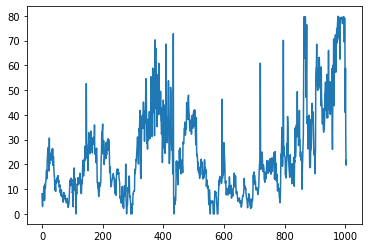

In [6]:
# Prepare points for matplotlib
features = []   # aka abscissa
labels = []     # aka ordinates
x = 0
for gust in gusts:
    features.append(x)
    x += 1
    labels.append(gust)

plt.plot(features, labels)


Define the filter function

In [7]:
ALPHA = 0.015


def low_pass(alpha, value, acc):
    return (value * alpha) + (acc * (1 - alpha))

Filter the data, into a new array

In [8]:
acc = 0
filtered_data = []
for gust in gusts:
    acc = low_pass(ALPHA, gust, acc)
    filtered_data.append(acc)
print("We now have {} filtered data".format(len(filtered_data)))

We now have 1005 filtered data


Draw filtered data

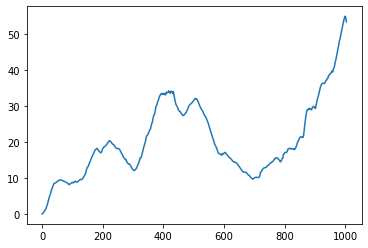

In [9]:
# Prepare points for matplotlib
features = []   # aka abscissa
labels = []  # aka ordinates
x = 0
for gust in filtered_data:
    features.append(x)
    x += 1
    labels.append(gust)

plt.plot(features, labels)

And that's it!